In [76]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import statsmodels.graphics.tsaplots as sgt

In [77]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data_ASC.csv")
df=df[['Date','BTC_close']]
df=df[2653:4653]
df.index = df.Date
df.drop(columns = ['Date'], inplace = True)
df

,BTC_close
Date,
2017-10-24,5513.1
2017-10-25,5734.0
2017-10-26,5887.6
2017-10-27,5764.6
2017-10-28,5726.6
...,...
2023-04-11,30209.6
2023-04-12,29886.4
2023-04-13,30387.4


In [78]:
df.describe

<bound method NDFrame.describe of             BTC_close
Date                 
2017-10-24     5513.1
2017-10-25     5734.0
2017-10-26     5887.6
2017-10-27     5764.6
2017-10-28     5726.6
...               ...
2023-04-11    30209.6
2023-04-12    29886.4
2023-04-13    30387.4
2023-04-14    30472.5
2023-04-15    30299.6

[2000 rows x 1 columns]>

In [79]:
n=int(len(df)*0.8)
train=df[:n]
test=df[n:]

In [80]:
print(len(train),len(test))

1600 400


In [81]:
train

,BTC_close
Date,
2017-10-24,5513.1
2017-10-25,5734.0
2017-10-26,5887.6
2017-10-27,5764.6
2017-10-28,5726.6
...,...
2022-03-07,38024.8
2022-03-08,38744.8
2022-03-09,41929.0


In [82]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic :{result[0]}")
print(f"p-value :{result[1]}")

ADF Statistic :-1.4482195380846372
p-value :0.5589534303715027


P>0.05 ==> The series is not stationary

In [83]:
from statsmodels.graphics.tsaplots import plot_acf

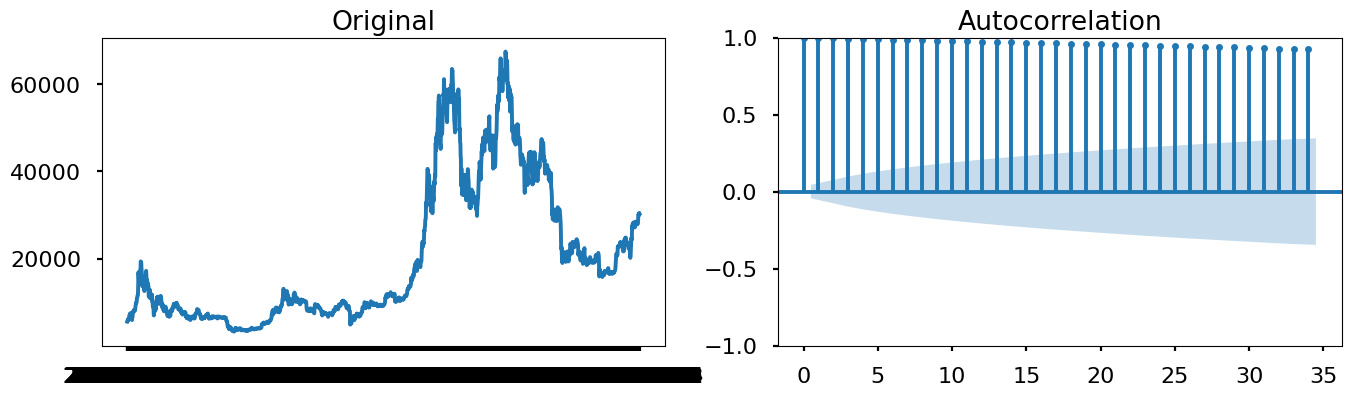

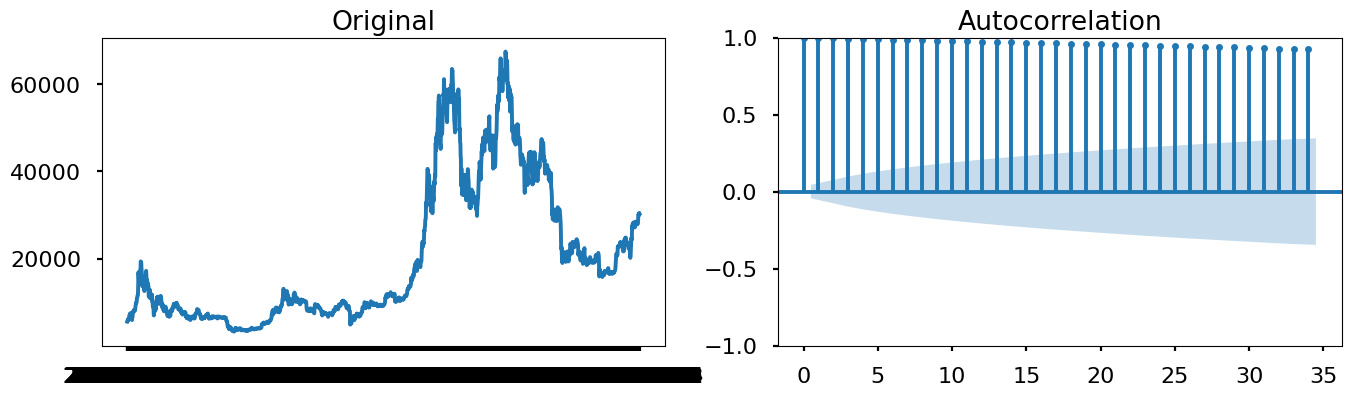

In [84]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df)
ax1.set_title("Original")
plot_acf(df,ax=ax2)


In [85]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from pmdarima.arima.utils import ndiffs

In [87]:
ndiffs(df,test="adf")

1

d=1

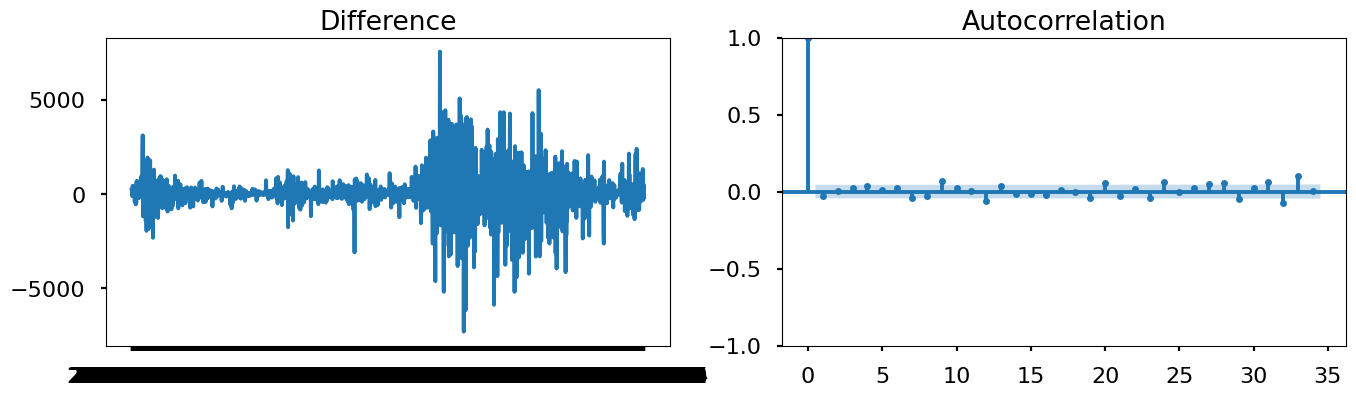

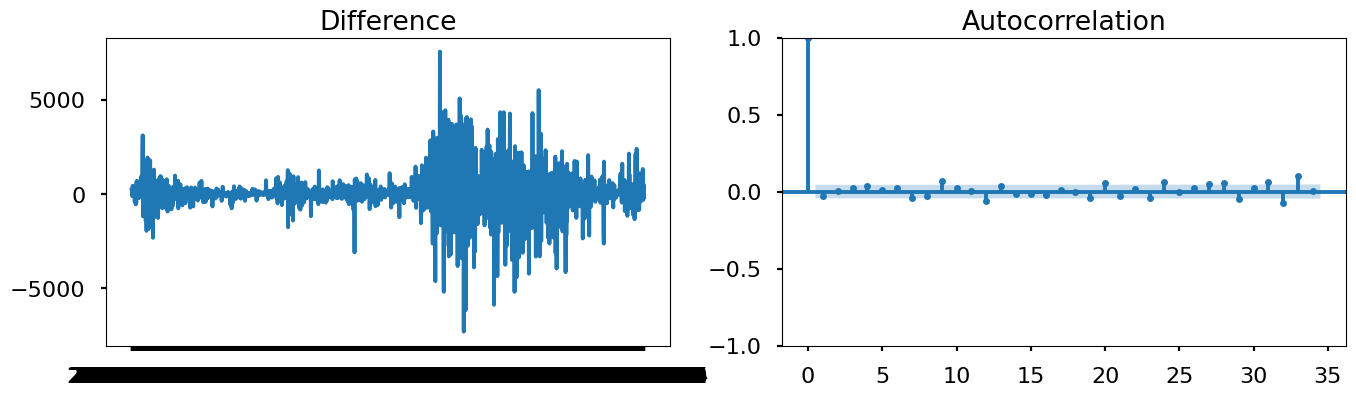

In [88]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference")
plot_acf(diff,ax=ax2)

In [89]:
start_index = len(train)
end_index = len(train)+len(test)-1

In [109]:
score = float('inf')
for p in range(1,10):
    for q in range(1,10):
 # for each combination of parameters, train an arima
      model = sm.tsa.arima.ARIMA(train, order=(p, 1, q))
      model = model.fit()
 # evaluate the ARIMA on the test set
      test_pred = model.predict(start=start_index, end=end_index)
 # if we got a better score, store the score and parameters
      if  model.aic< score:
        score = model.aic
        best_parameters = {'p': p, 'd':1 ,'q':q}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: 26705.56
Best parameters: {'p': 9, 'd': 1, 'q': 9}


p=9

q=4

In [91]:
import statsmodels.api as sm

In [92]:
model = sm.tsa.arima.ARIMA(train, order=(9, 1, 9))
model = model.fit()

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BTC_close   No. Observations:                 1600
Model:                 ARIMA(9, 1, 9)   Log Likelihood              -13333.779
Date:                Thu, 22 Jun 2023   AIC                          26705.558
Time:                        02:33:08   BIC                          26807.723
Sample:                    10-24-2017   HQIC                         26743.496
                         - 03-11-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0818      0.202      0.404      0.686      -0.315       0.478
ar.L2          0.1302      0.115      1.132      0.257      -0.095       0.356
ar.L3         -0.5116      0.038    -13.434      0.000      -0.586      -0.437
ar.L4          0.6771      0.099      6.819      0.000       0.483       0.872
ar.L5         -0.0375      0.193     -0.194      0.846      -0.416       0.341
ar.L6         -0.3750      0.089     -4.213      0.000      -0.549      -0.201
ar.L7          0.4385      0.045      9.822      0.000       0.351       0.526
ar.L8         -0.5746      0.115     -5.001      0.000      -0.800      -0.349
ar.L9         -0.3571      0.175     -2.041      0.041      -0.700      -0.014
ma.L1         -0.1058      0.195     -0.543      0.587      -0.488       0.276
ma.L2         -0.1184      0.124     -0.958      0.338      -0.361       0.124
ma.L3          0.5370      0.045     11.945      0.000       0.449       0.625
ma.L4         -0.6658      0.090     -7.359      0.000      -0.843      -0.488
ma.L5          0.0608      0.188      0.323      0.746      -0.308       0.429
ma.L6          0.4083      0.101      4.040      0.000       0.210       0.606
ma.L7         -0.4836      0.038    -12.851      0.000      -0.557      -0.410
ma.L8          0.5585      0.117      4.783      0.000       0.330       0.787
ma.L9          0.4455      0.173      2.570      0.010       0.106       0.785
sigma2      1.062e+06   1.89e+04     56.214      0.000    1.03e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5072.41
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              14.69   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
train_pred = model.fittedvalues
train_pred


Date
2017-10-24        0.000000
2017-10-25     5422.274942
2017-10-26     5725.169508
2017-10-27     5915.002725
2017-10-28     5909.963308
                  ...     
2022-03-07    38584.527152
2022-03-08    38103.598996
2022-03-09    38756.743008
2022-03-10    41561.599471
2022-03-11    39959.148910
Length: 1600, dtype: float64

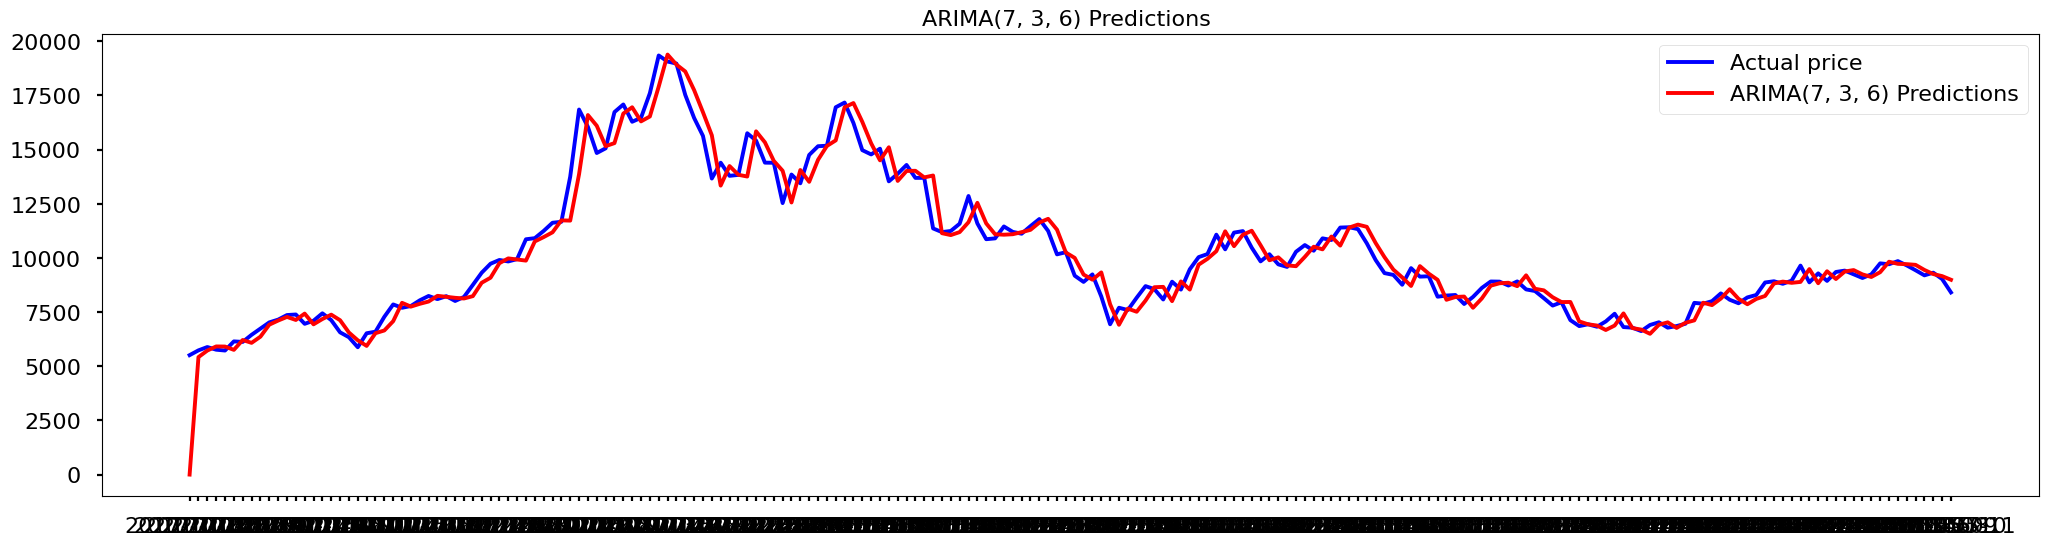

In [111]:
plt.rcParams["figure.figsize"] = 25, 6

# Defining the subplots
fig, ax = plt.subplots(1, 1)

# Actuals vs Predictions for ARIMA(9, 1, 4)
ax.plot(train[0:200], color = "blue", label = "Actual price")

ax.plot(train_pred[0:200], color = "red", label = "ARIMA(7, 3, 6) Predictions")
ax.set_title(f"ARIMA(7, 3, 6) Predictions ", size = 16)
plt.legend()
# Displaying the plots
plt.show()

In [104]:
test

,BTC_close
Date,
2022-03-12,38814.3
2022-03-13,37792.4
2022-03-14,39671.1
2022-03-15,39285.7
2022-03-16,41118.7
...,...
2023-04-11,30209.6
2023-04-12,29886.4
2023-04-13,30387.4


In [105]:
start_index = len(train)
end_index = len(train)+len(test)-1
test_pred = model.predict(start=start_index, end=end_index)
test_pred

2022-03-12    38543.875543
2022-03-13    38032.408241
2022-03-14    37764.742374
2022-03-15    38164.837171
2022-03-16    38007.759118
                  ...     
2023-04-11    38103.378939
2023-04-12    38104.143082
2023-04-13    38103.452051
2023-04-14    38103.853513
2023-04-15    38103.922437
Freq: D, Name: predicted_mean, Length: 400, dtype: float64

TypeError: ignored

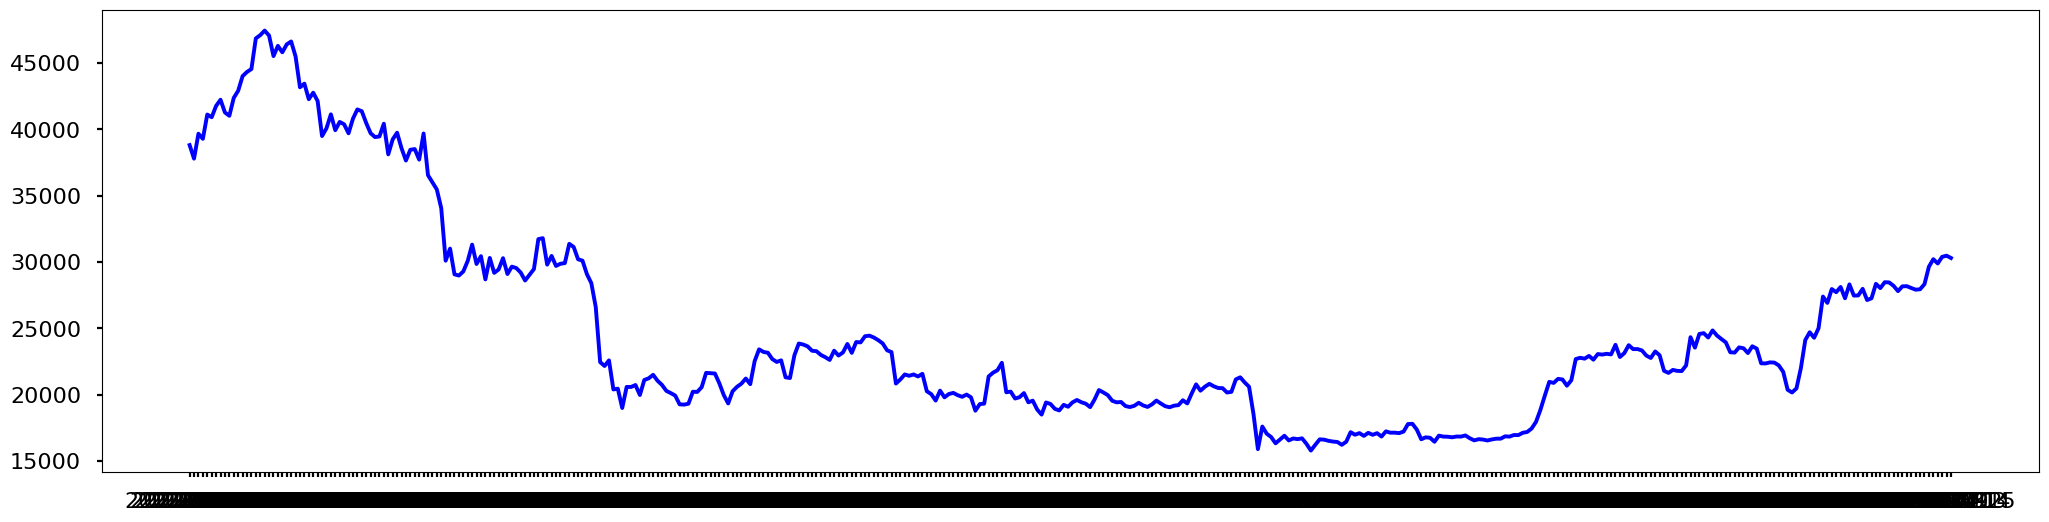

In [110]:
plt.rcParams["figure.figsize"] = 25, 6
fig, ax = plt.subplots(1, 1)
ax.plot(test, color = "blue", label = "Actual price")
ax.plot(test_pred, color = "red", label = "ARIMA(7, 3, 6) Predictions")
ax.set_title(f"ARIMA(7, 3, 6) Test Predictions ", size = 16)

# Displaying the plots
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
def AUC(test,test_pred):
    count = 0
    for i in range(1,len(test)):
        if (test.values[i] - test.values[i-1]) * (test_pred.values[i] - test_pred.values[i-1]) > 0:
            count += 1
    return count/(len(test)-1)
def AUC(train,train_pred):
    count = 0
    for i in range(1,len(train)):
        if (train.values[i]- train.values[i-1]) * (train_pred.values[i] - train_pred.values[i-1]) > 0:
            count += 1
    return count/(len(train)-1)
print("Test accuracy for train set")
#RMSE train accuracy
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(train, train_pred)))

#MAPE train accuracy
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(train,train_pred))
print("AUC train:",AUC(train,train_pred))
print("Test accuracy for test set")
#RMSE test accuracy
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(test, test_pred)))

#MAPE test accuracy
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(test, test_pred))
#AUC
print("AUC test:",AUC(test,test_pred))


Test accuracy for train set
Root Mean Square Error (RMSE): 1020.2633073525739
Mean Absolute Percentage Error (MAPE): 0.030263129046967093
AUC train: 0.48530331457160725
Test accuracy for test set
Root Mean Square Error (RMSE): 15463.322692759037
Mean Absolute Percentage Error (MAPE): 0.6874767829267079
AUC test: 0.49373433583959897
